In [1]:
#imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#loading data
start_date = '2016-10-01'
end_date = '2022-12-01'
df = web.DataReader('BTC-USD','yahoo',start_date,end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-10-01,615.237000,609.929016,609.929016,613.982971,5.635700e+07,613.982971
2016-10-02,614.005005,609.682007,613.947998,610.892029,3.924980e+07,610.892029
2016-10-03,612.567993,610.455017,610.968018,612.132996,4.679830e+07,612.132996
2016-10-04,612.054016,609.479004,612.052002,610.203979,4.980160e+07,610.203979
2016-10-05,613.814026,609.617004,610.218018,612.510986,6.807750e+07,612.510986
...,...,...,...,...,...,...
2022-10-28,20724.980469,20086.068359,20287.957031,20595.351562,4.399472e+10,20595.351562
2022-10-29,20988.394531,20566.484375,20595.103516,20818.476562,4.036984e+10,20818.476562
2022-10-30,20917.005859,20547.462891,20817.982422,20635.603516,3.148635e+10,20635.603516


In [3]:
#number of rows and columns
df.shape

(2223, 6)

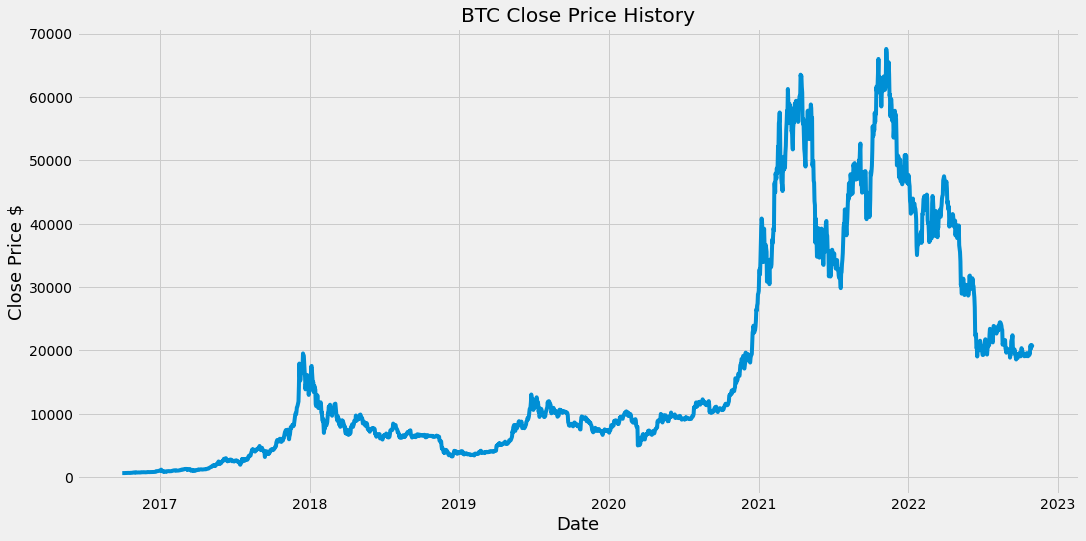

In [4]:
#visualize close price
plt.figure(figsize=(16,8))
plt.title('BTC Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.show()

In [5]:
#only close data
data = df.filter(['Close'])
dataset = data.values
#get the number of rows to train model
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1779

In [6]:
#Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[5.64394001e-05],
       [1.02760455e-05],
       [2.88099368e-05],
       ...,
       [2.99080185e-01],
       [2.96991817e-01],
       [2.96141774e-01]])

In [7]:
#create scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#split dataset to x and y
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([5.64394001e-05, 1.02760455e-05, 2.88099368e-05, 0.00000000e+00,
       3.44552442e-05, 4.20722615e-05, 1.03305569e-04, 1.32981491e-04,
       9.77951734e-05, 1.31279603e-04, 4.61015506e-04, 3.88132428e-04,
       3.97003756e-04, 4.50650128e-04, 4.24782715e-04, 4.69363597e-04,
       4.32952139e-04, 4.14537663e-04, 3.03420913e-04, 3.08453650e-04,
       3.37890742e-04, 7.03291533e-04, 6.99960683e-04, 6.50525731e-04,
       7.07682530e-04, 1.01707691e-03, 1.16656133e-03, 1.18654461e-03,
       1.55735188e-03, 1.36894647e-03, 1.35562398e-03, 1.78606750e-03,
       1.95088987e-03, 1.17234155e-03, 1.38942199e-03, 1.39215576e-03,
       1.51318849e-03, 1.38786869e-03, 1.48818798e-03, 1.68869073e-03,
       1.57310824e-03, 1.58620648e-03, 1.41658929e-03, 1.37144050e-03,
       1.41609613e-03, 1.51463788e-03, 2.00120631e-03, 1.95310041e-03,
       2.11153182e-03, 2.11199489e-03, 1.80448198e-03, 1.92727767e-03,
       2.10797673e-03, 2.00712053e-03, 1.94282528e-03, 1.96313672e-03,
     

In [8]:
#convert to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape Data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1719, 60, 1)

In [10]:
#Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss ='mean_squared_error')

In [12]:
model.fit(x_train,y_train,batch_size=1, epochs=1)

1719/1719 [==============================] - 41s 23ms/step - loss: 0.0017


In [13]:
#create the testing DataSet
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
#Convert Data into a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape Data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Evaluate model root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
#rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

601.81103515625

/home/acge248/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


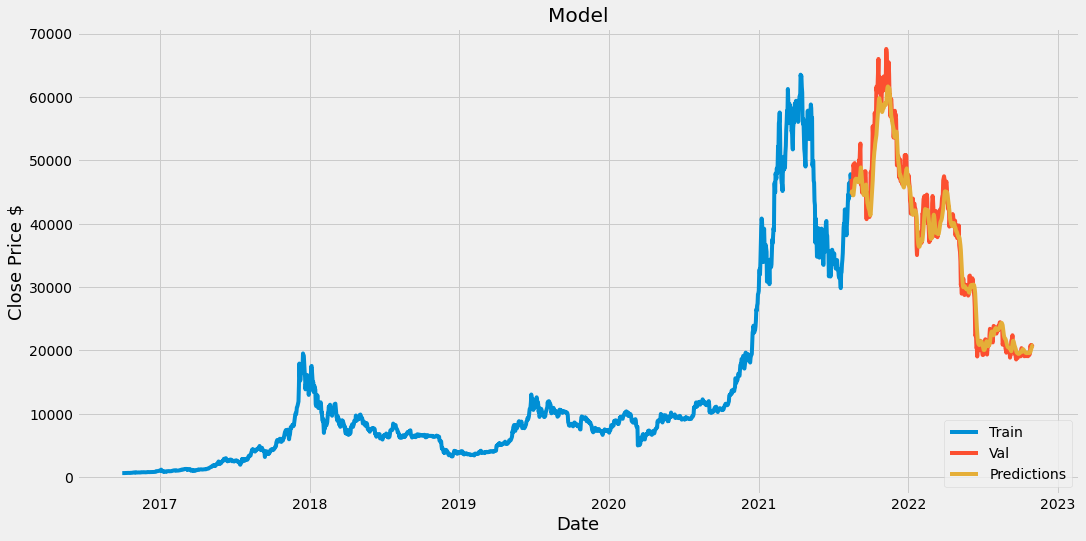

In [18]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [19]:
#Show Valid and Predicted price
valid

,Close,Predictions
Date,,
2021-08-15,47047.003906,44712.734375
2021-08-16,46004.484375,45054.121094
2021-08-17,44695.359375,45104.800781
2021-08-18,44801.187500,44810.265625
2021-08-19,46717.578125,44456.742188
...,...,...
2022-10-28,20595.351562,20282.607422
2022-10-29,20818.476562,20475.279297
2022-10-30,20635.603516,20663.443359
